In [5]:
import numpy as np 
 #neccessary for wordcloud
from PIL import Image,ImageOps
 #pillow module neccessary for wordcloud
import matplotlib.pyplot as plt
 #to show and save image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator #the real wordcloud module
from scipy.ndimage import gaussian_gradient_magnitude #edge detection

In [7]:
import os
import json
import plotly.graph_objs as go
import plotly.express as px

In [3]:
with open('charid2desc.json','r') as f:
    charid2desc = json.load(f)
charid2desc = {k:v for k,v in charid2desc.items() if v}

In [4]:
desc_text = ' '.join(list(charid2desc.values()))

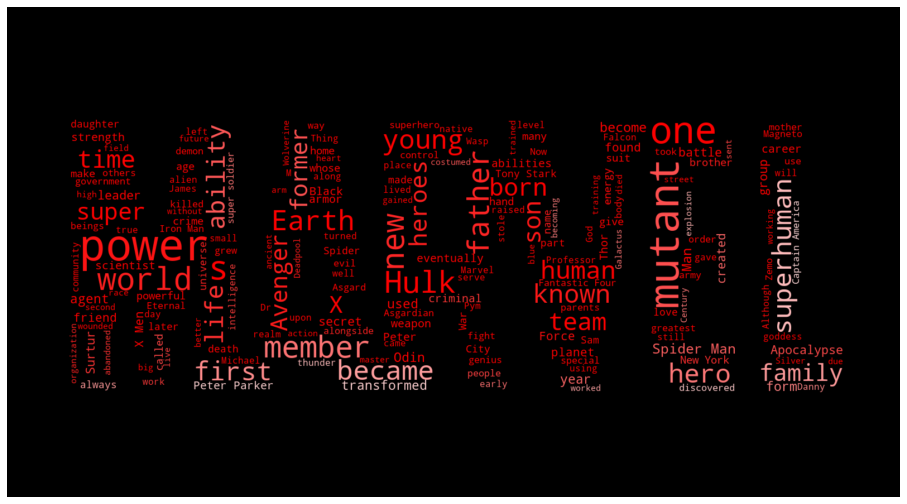

In [6]:
image = np.array(Image.open("Font-Marvel-Logo.jpeg"))
# image = np.array(Image.open("Marvel_Studios_2016_logo.webp"))


image_mask = image.copy()
image[image_mask.sum(axis=2) == 0] = 255

edges = np.mean([gaussian_gradient_magnitude(image[:, :, i] / 255., 2) for i in range(3)], axis=0)
image_mask[edges > .1] = 255
wc = WordCloud(background_color='black', mask=image_mask, mode='RGBA',width=1000, height=600,)
wc.generate(desc_text)
image_colors = ImageColorGenerator(image)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(16, 12))
plt.axis('off')
plt.imshow(wc, interpolation="bilinear")
# wc.to_file("marvel_wordcloud.png")

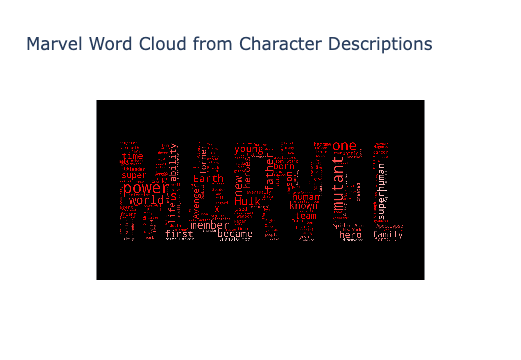

In [8]:
fig = px.imshow(wc.to_array(), title="Marvel Word Cloud from Character Descriptions")
fig.update_layout({'xaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False},
                        'yaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False}})

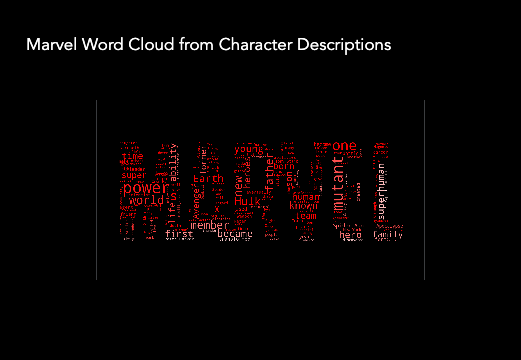

In [9]:
fig.update_layout(
    scene = dict(
        xaxis = dict(
            gridcolor="rgb(50,50,50)",
            backgroundcolor="rgb(0,0,0)",
            showbackground=True,
        ),
        yaxis = dict(
            gridcolor="rgb(50,50,50)",
            backgroundcolor="rgb(0,0,0)",
            showbackground=True,
        ),
        zaxis = dict(
            gridcolor="rgb(50,50,50)",
            backgroundcolor="rgb(0,0,0)",
            showbackground=True,
        ),
    ),
    font_family = "Avenir",
    font_color="white",
    paper_bgcolor='rgba(0,0,0)',
)